In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('ggplot')


In [10]:
def ci(p, r, t=1, n=1):
    return round(p * (1 + (r/100) / n)**(n*t), 2)

In [11]:
i_rates = [i for i in range(15, 35)]
years = [y for y in range(1, 21)]

In [12]:
cols = list()
for i in i_rates:
    cols.append(f'{i}%')
    
data = np.zeros((len(years), len(i_rates)))

In [13]:
for col, rate in enumerate(i_rates):
    for row, year in enumerate(years):
        data[row, col] = ci(1, r = rate, t = year, n=1)

In [14]:
df = pd.DataFrame(data, columns=cols)
df['year'] = [f'Year {y}' for y in years]
df.set_index('year', inplace=True)
df.head(10)

,15%,16%,17%,18%,19%,20%,21%,22%,23%,24%,25%,26%,27%,28%,29%,30%,31%,32%,33%,34%
year,,,,,,,,,,,,,,,,,,,,
Year 1,1.15,1.16,1.17,1.18,1.19,1.20,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.30,1.31,1.32,1.33,1.34
Year 2,1.32,1.35,1.37,1.39,1.42,1.44,1.46,1.49,1.51,1.54,1.56,1.59,1.61,1.64,1.66,1.69,1.72,1.74,1.77,1.80
Year 3,1.52,1.56,1.60,1.64,1.69,1.73,1.77,1.82,1.86,1.91,1.95,2.00,2.05,2.10,2.15,2.20,2.25,2.30,2.35,2.41
Year 4,1.75,1.81,1.87,1.94,2.01,2.07,2.14,2.22,2.29,2.36,2.44,2.52,2.60,2.68,2.77,2.86,2.94,3.04,3.13,3.22
Year 5,2.01,2.10,2.19,2.29,2.39,2.49,2.59,2.70,2.82,2.93,3.05,3.18,3.30,3.44,3.57,3.71,3.86,4.01,4.16,4.32
Year 6,2.31,2.44,2.57,2.70,2.84,2.99,3.14,3.30,3.46,3.64,3.81,4.00,4.20,4.40,4.61,4.83,5.05,5.29,5.53,5.79
Year 7,2.66,2.83,3.00,3.19,3.38,3.58,3.80,4.02,4.26,4.51,4.77,5.04,5.33,5.63,5.94,6.27,6.62,6.98,7.36,7.76
Year 8,3.06,3.28,3.51,3.76,4.02,4.30,4.59,4.91,5.24,5.59,5.96,6.35,6.77,7.21,7.67,8.16,8.67,9.22,9.79,10.40
Year 9,3.52,3.80,4.11,4.44,4.79,5.16,5.56,5.99,6.44,6.93,7.45,8.00,8.59,9.22,9.89,10.60,11.36,12.17,13.02,13.93


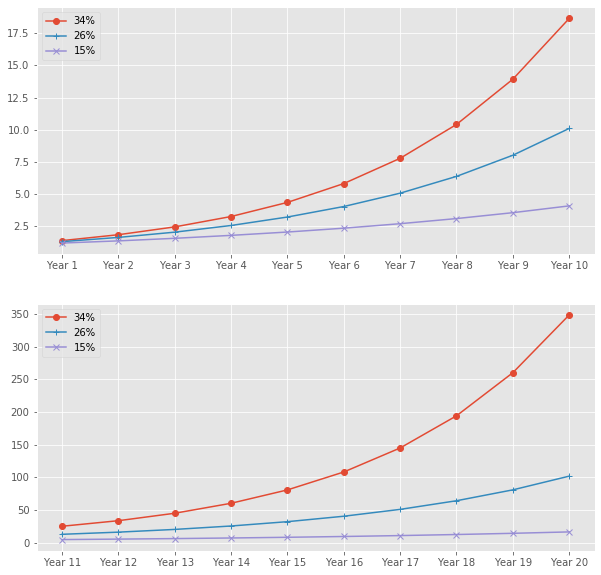

In [15]:
fig, ax = plt.subplots(2,1, figsize=(10, 10))

ax[0].plot(df['34%'][:10], label='34%', marker='o')
ax[0].plot(df['26%'][:10], label='26%', marker='+')
ax[0].plot(df['15%'][:10], label='15%', marker='x')
ax[0].legend(loc = 2)

ax[1].plot(df['34%'][10:], label='34%', marker='o')
ax[1].plot(df['26%'][10:], label='26%', marker='+')
ax[1].plot(df['15%'][10:], label='15%', marker='x')
ax[1].legend(loc = 2)

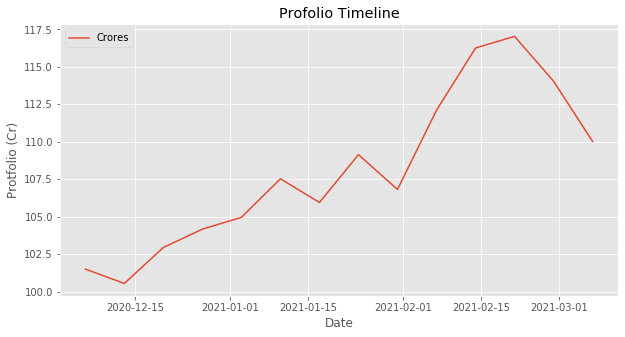

In [16]:
data="""06-Dec-20	101.51
13-Dec-20	100.55
20-Dec-20	102.95
27-Dec-20	104.17
03-Jan-21	104.96
10-Jan-21	107.53
17-Jan-21	105.95
24-Jan-21	109.14
31-Jan-21	106.82
07-Feb-21	112.10
14-Feb-21	116.25
21-Feb-21	117.03
28-Feb-21	114.04
07-Mar-21	110.02""".split('\n')
data = [d.split('\t') for d in data]
data = [(datetime.strptime(d[0], '%d-%b-%y'), float(d[1])) for d in data]
x = list()
y = list()

for a, b in data:
    x.append(a)
    y.append(b)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(x,y, label='Crores')
ax.set_xlabel('Date')
ax.set_ylabel('Protfolio (Cr)')
ax.set_title('Profolio Timeline')
ax.legend(loc=2)